In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
proba_phenotype = pd.read_csv('analysis/Pictilisib/mutations_genes/PI3K_target_sigmoid/results/sensitive_resistant_results/patients_phenot_table.csv',  index_col=0)

In [3]:


# Suppose your columns are like: 'EGF_Invasion', 'FGF_Invasion', ...
invasion_cols = [col for col in proba_phenotype.columns if 'Invasion' in col]
proba_phenotype['mean_invasion'] = proba_phenotype[invasion_cols].mean(axis=1)

# Repeat for other phenotypes if needed
apoptosis_cols = [col for col in proba_phenotype.columns if 'Apoptosis' in col]
proba_phenotype['mean_apoptosis'] = proba_phenotype[apoptosis_cols].mean(axis=1)


In [4]:
proba_phenotype

,Acidosis_Apoptosis,Acidosis_Invasion,Acidosis_DNA_Repair,Acidosis_Proliferation,Nutrients_Apoptosis,Nutrients_Invasion,Nutrients_DNA_Repair,Nutrients_Proliferation,EGF_Apoptosis,EGF_Invasion,...,TNFalpha_Apoptosis,TNFalpha_Invasion,TNFalpha_DNA_Repair,TNFalpha_Proliferation,FGF_Apoptosis,FGF_Invasion,FGF_DNA_Repair,FGF_Proliferation,mean_invasion,mean_apoptosis
SIDM00360,0.262538,0.142322,0.002000,0.996000,0.309298,0.124000,0.012000,0.996000,0.267926,0.116704,...,0.227306,0.633909,0.000000,0.996319,0.304000,0.152000,0.008000,0.986000,0.191174,0.284810
SIDM00957,0.104539,0.641170,0.294437,0.668846,0.096164,0.662092,0.211428,0.656425,0.096755,0.692200,...,0.109065,0.648221,0.264094,0.654451,0.086449,0.663356,0.230873,0.661719,0.667647,0.104745
SIDM00956,0.078094,0.999700,0.004000,1.000000,0.116977,0.996000,0.006000,0.994000,0.080094,0.999700,...,0.060835,0.996000,0.002000,0.996000,0.063376,0.998000,0.004000,1.000000,0.993986,0.088388
SIDM00834,0.046714,0.564503,0.002000,0.156655,0.052000,0.596231,0.004000,0.149154,0.041957,0.609812,...,0.157458,0.659813,0.006000,0.118087,0.052833,0.594006,0.002000,0.162804,0.597319,0.060962
SIDM00835,0.392000,0.253977,0.002000,0.457505,0.472458,0.272505,0.000000,0.499350,0.423712,0.272849,...,0.478000,0.505625,0.000000,0.505714,0.384213,0.260823,0.002000,0.459104,0.316511,0.457291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIDM00425,0.488530,0.990000,0.000000,0.990837,0.541480,0.990186,0.006000,0.986009,0.530886,0.984528,...,0.538526,0.984000,0.002000,0.978000,0.573034,0.978677,0.002000,0.975193,0.985116,0.529389
SIDM00145,0.964505,0.008000,0.391058,0.993999,0.964000,0.030000,0.464364,0.986000,0.964505,0.008000,...,0.970000,0.002000,0.396124,0.997817,0.966000,0.025293,0.433693,0.990000,0.013614,0.964213
SIDM00435,0.902000,0.036000,0.002000,0.989308,0.870736,0.028381,0.006000,0.982093,0.891863,0.036800,...,0.891566,0.096000,0.008000,0.988000,0.899267,0.031308,0.006000,0.973999,0.037952,0.896449
SIDM00540,0.479629,0.208823,0.000000,0.386726,0.499316,0.229619,0.000000,0.348000,0.464069,0.261797,...,0.551772,0.926000,0.005427,0.411303,0.480278,0.272965,0.000000,0.409956,0.341520,0.474883


In [5]:
X = proba_phenotype[['mean_invasion', 'mean_apoptosis']]
X

,mean_invasion,mean_apoptosis
SIDM00360,0.191174,0.284810
SIDM00957,0.667647,0.104745
SIDM00956,0.993986,0.088388
SIDM00834,0.597319,0.060962
SIDM00835,0.316511,0.457291
...,...,...
SIDM00425,0.985116,0.529389
SIDM00145,0.013614,0.964213
SIDM00435,0.037952,0.896449
SIDM00540,0.341520,0.474883


In [11]:
from sklearn.cluster import KMeans

# Choose number of clusters (try 2, 3, or use silhouette score to optimize)
kmeans = KMeans(n_clusters=4, random_state=42)
proba_phenotype['cluster'] = kmeans.fit_predict(X)

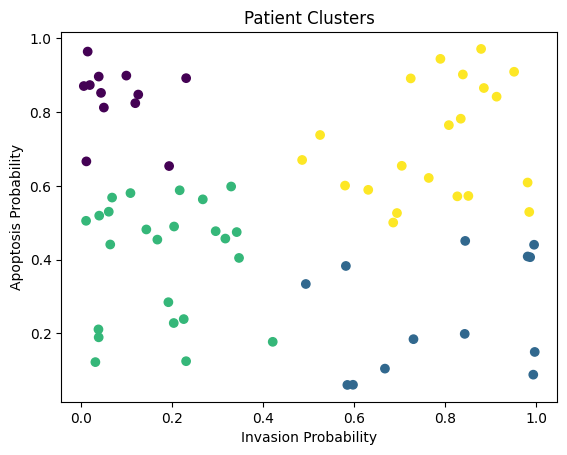

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X['mean_invasion'], X['mean_apoptosis'], c=proba_phenotype['cluster'])
plt.xlabel('Invasion Probability')
plt.ylabel('Apoptosis Probability')
plt.title('Patient Clusters')
plt.show()

In [13]:
proba_phenotype

,Acidosis_Apoptosis,Acidosis_Invasion,Acidosis_DNA_Repair,Acidosis_Proliferation,Nutrients_Apoptosis,Nutrients_Invasion,Nutrients_DNA_Repair,Nutrients_Proliferation,EGF_Apoptosis,EGF_Invasion,...,TNFalpha_Invasion,TNFalpha_DNA_Repair,TNFalpha_Proliferation,FGF_Apoptosis,FGF_Invasion,FGF_DNA_Repair,FGF_Proliferation,mean_invasion,mean_apoptosis,cluster
SIDM00360,0.262538,0.142322,0.002000,0.996000,0.309298,0.124000,0.012000,0.996000,0.267926,0.116704,...,0.633909,0.000000,0.996319,0.304000,0.152000,0.008000,0.986000,0.191174,0.284810,2
SIDM00957,0.104539,0.641170,0.294437,0.668846,0.096164,0.662092,0.211428,0.656425,0.096755,0.692200,...,0.648221,0.264094,0.654451,0.086449,0.663356,0.230873,0.661719,0.667647,0.104745,1
SIDM00956,0.078094,0.999700,0.004000,1.000000,0.116977,0.996000,0.006000,0.994000,0.080094,0.999700,...,0.996000,0.002000,0.996000,0.063376,0.998000,0.004000,1.000000,0.993986,0.088388,1
SIDM00834,0.046714,0.564503,0.002000,0.156655,0.052000,0.596231,0.004000,0.149154,0.041957,0.609812,...,0.659813,0.006000,0.118087,0.052833,0.594006,0.002000,0.162804,0.597319,0.060962,1
SIDM00835,0.392000,0.253977,0.002000,0.457505,0.472458,0.272505,0.000000,0.499350,0.423712,0.272849,...,0.505625,0.000000,0.505714,0.384213,0.260823,0.002000,0.459104,0.316511,0.457291,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIDM00425,0.488530,0.990000,0.000000,0.990837,0.541480,0.990186,0.006000,0.986009,0.530886,0.984528,...,0.984000,0.002000,0.978000,0.573034,0.978677,0.002000,0.975193,0.985116,0.529389,3
SIDM00145,0.964505,0.008000,0.391058,0.993999,0.964000,0.030000,0.464364,0.986000,0.964505,0.008000,...,0.002000,0.396124,0.997817,0.966000,0.025293,0.433693,0.990000,0.013614,0.964213,0
SIDM00435,0.902000,0.036000,0.002000,0.989308,0.870736,0.028381,0.006000,0.982093,0.891863,0.036800,...,0.096000,0.008000,0.988000,0.899267,0.031308,0.006000,0.973999,0.037952,0.896449,0
SIDM00540,0.479629,0.208823,0.000000,0.386726,0.499316,0.229619,0.000000,0.348000,0.464069,0.261797,...,0.926000,0.005427,0.411303,0.480278,0.272965,0.000000,0.409956,0.341520,0.474883,2


In [19]:
healthy_ids = pd.read_csv('analysis/Pictilisib/top_healthy_ids.txt', header=None)
res_ids = pd.read_csv('analysis/Pictilisib/top_resistant_ids.txt', header=None)
sens_ids = pd.read_csv('analysis/Pictilisib/top_sensitive_ids.txt', header=None)

In [25]:
sens_ids_list = sens_ids[0].tolist()
res_ids_list = res_ids[0].tolist()
healthy_ids_list = healthy_ids[0].tolist()

In [26]:
def get_status(idx):
    if idx in sens_ids_list:
        return 'sensitive'
    elif idx in res_ids_list:
        return 'resistant'
    else:
        return 'unknown'
    
proba_phenotype['status'] = proba_phenotype.index.map(get_status)

proba_phenotype

,Acidosis_Apoptosis,Acidosis_Invasion,Acidosis_DNA_Repair,Acidosis_Proliferation,Nutrients_Apoptosis,Nutrients_Invasion,Nutrients_DNA_Repair,Nutrients_Proliferation,EGF_Apoptosis,EGF_Invasion,...,TNFalpha_DNA_Repair,TNFalpha_Proliferation,FGF_Apoptosis,FGF_Invasion,FGF_DNA_Repair,FGF_Proliferation,mean_invasion,mean_apoptosis,cluster,status
SIDM00360,0.262538,0.142322,0.002000,0.996000,0.309298,0.124000,0.012000,0.996000,0.267926,0.116704,...,0.000000,0.996319,0.304000,0.152000,0.008000,0.986000,0.191174,0.284810,2,resistant
SIDM00957,0.104539,0.641170,0.294437,0.668846,0.096164,0.662092,0.211428,0.656425,0.096755,0.692200,...,0.264094,0.654451,0.086449,0.663356,0.230873,0.661719,0.667647,0.104745,1,resistant
SIDM00956,0.078094,0.999700,0.004000,1.000000,0.116977,0.996000,0.006000,0.994000,0.080094,0.999700,...,0.002000,0.996000,0.063376,0.998000,0.004000,1.000000,0.993986,0.088388,1,resistant
SIDM00834,0.046714,0.564503,0.002000,0.156655,0.052000,0.596231,0.004000,0.149154,0.041957,0.609812,...,0.006000,0.118087,0.052833,0.594006,0.002000,0.162804,0.597319,0.060962,1,resistant
SIDM00835,0.392000,0.253977,0.002000,0.457505,0.472458,0.272505,0.000000,0.499350,0.423712,0.272849,...,0.000000,0.505714,0.384213,0.260823,0.002000,0.459104,0.316511,0.457291,2,resistant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIDM00425,0.488530,0.990000,0.000000,0.990837,0.541480,0.990186,0.006000,0.986009,0.530886,0.984528,...,0.002000,0.978000,0.573034,0.978677,0.002000,0.975193,0.985116,0.529389,3,sensitive
SIDM00145,0.964505,0.008000,0.391058,0.993999,0.964000,0.030000,0.464364,0.986000,0.964505,0.008000,...,0.396124,0.997817,0.966000,0.025293,0.433693,0.990000,0.013614,0.964213,0,sensitive
SIDM00435,0.902000,0.036000,0.002000,0.989308,0.870736,0.028381,0.006000,0.982093,0.891863,0.036800,...,0.008000,0.988000,0.899267,0.031308,0.006000,0.973999,0.037952,0.896449,0,sensitive
SIDM00540,0.479629,0.208823,0.000000,0.386726,0.499316,0.229619,0.000000,0.348000,0.464069,0.261797,...,0.005427,0.411303,0.480278,0.272965,0.000000,0.409956,0.341520,0.474883,2,sensitive


In [27]:
proba_phenotype_filtered = proba_phenotype[['mean_invasion', 'mean_apoptosis', 'cluster', 'status']]

proba_phenotype_filtered

,mean_invasion,mean_apoptosis,cluster,status
SIDM00360,0.191174,0.284810,2,resistant
SIDM00957,0.667647,0.104745,1,resistant
SIDM00956,0.993986,0.088388,1,resistant
SIDM00834,0.597319,0.060962,1,resistant
SIDM00835,0.316511,0.457291,2,resistant
...,...,...,...,...
SIDM00425,0.985116,0.529389,3,sensitive
SIDM00145,0.013614,0.964213,0,sensitive
SIDM00435,0.037952,0.896449,0,sensitive
SIDM00540,0.341520,0.474883,2,sensitive


In [ ]:
for cluster_id in proba_phenotype['cluster'].unique():
    patients_in_cluster = proba_phenotype.index[proba_phenotype['cluster'] == cluster_id]
    # Use these patient IDs for further analysis